   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None

Missing values:
 Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64


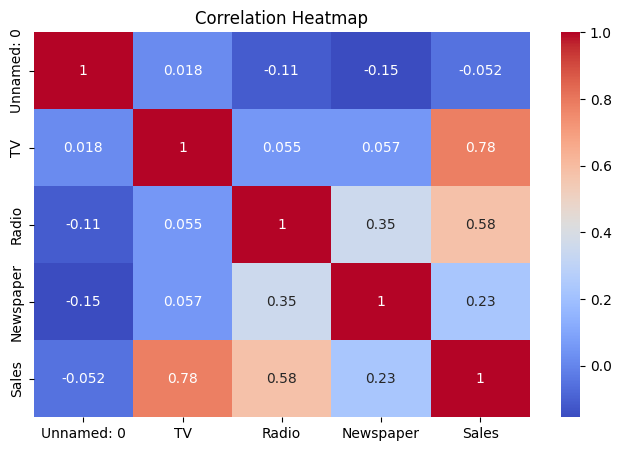

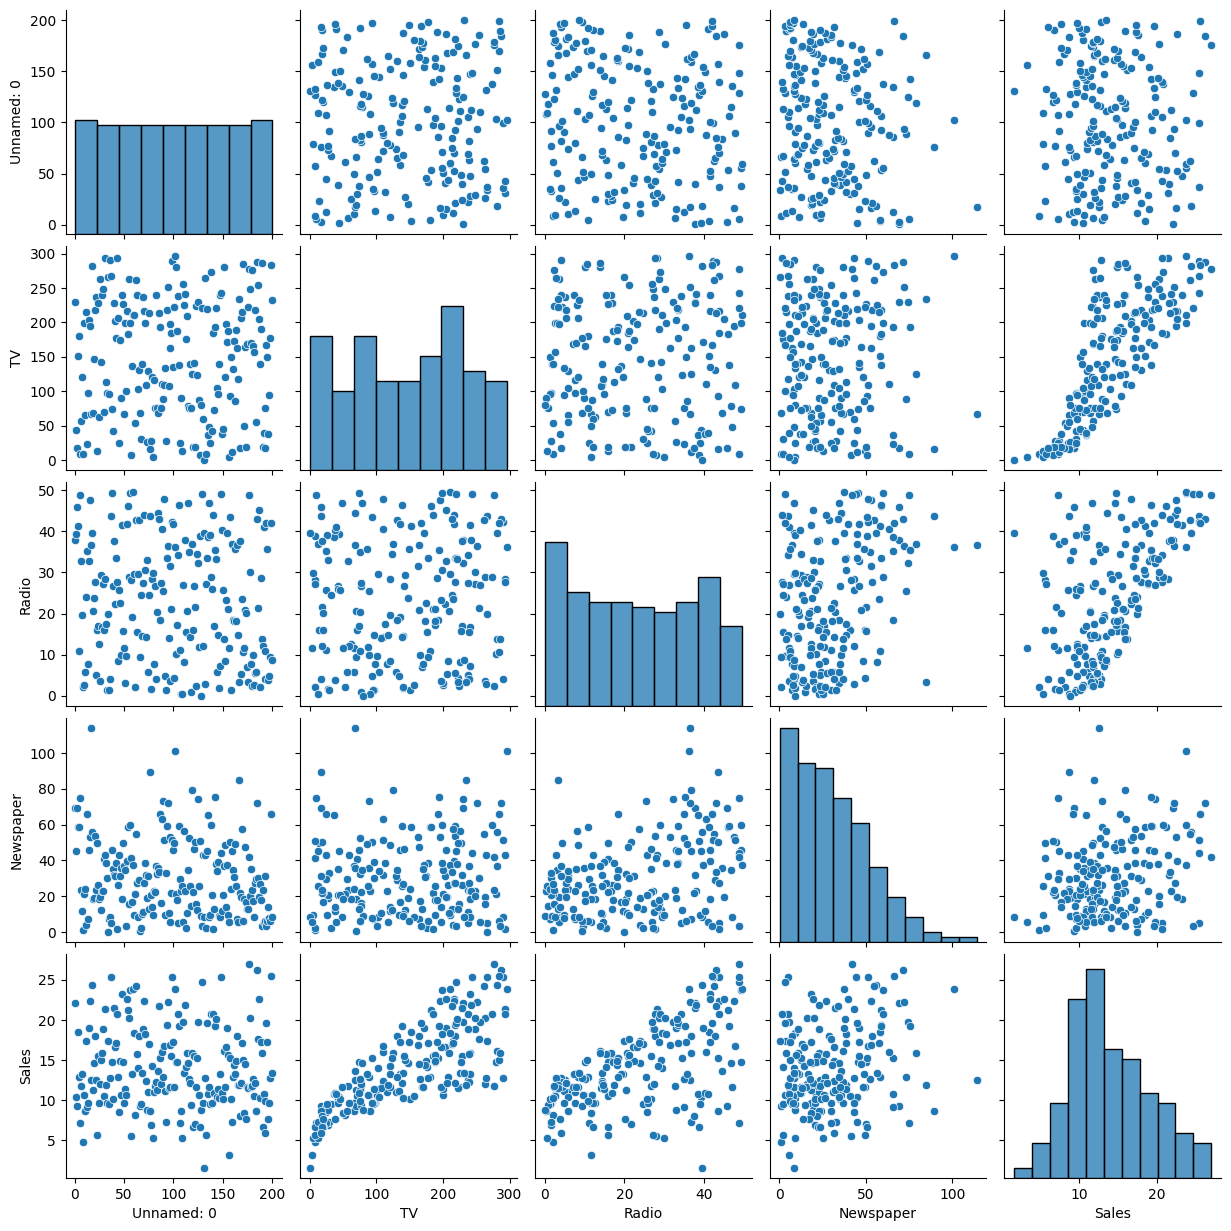


===== Linear Regression Evaluation =====
R2 Score: 0.8994380241009119
MAE: 1.4607567168117608
RMSE: 1.7815996615334506

===== Random Forest Evaluation =====
R2 Score: 0.9818333477552758
MAE: 0.6287125000000021
RMSE: 0.7572349907723515

Predicted sales for TV=150, Radio=30, Newspaper=20 →  16.72300000000001


C:\Users\rohit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


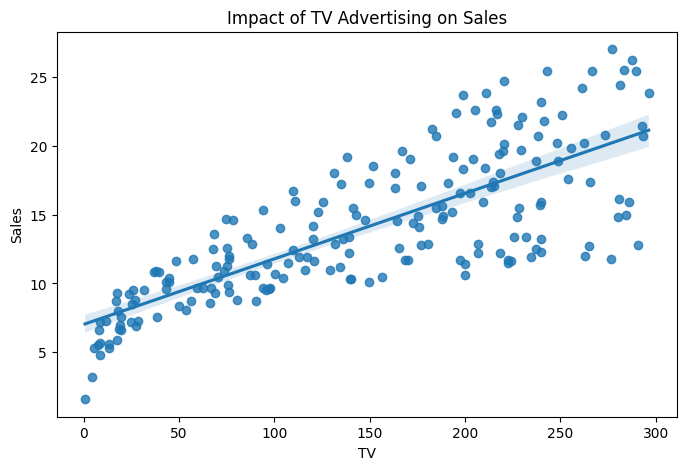

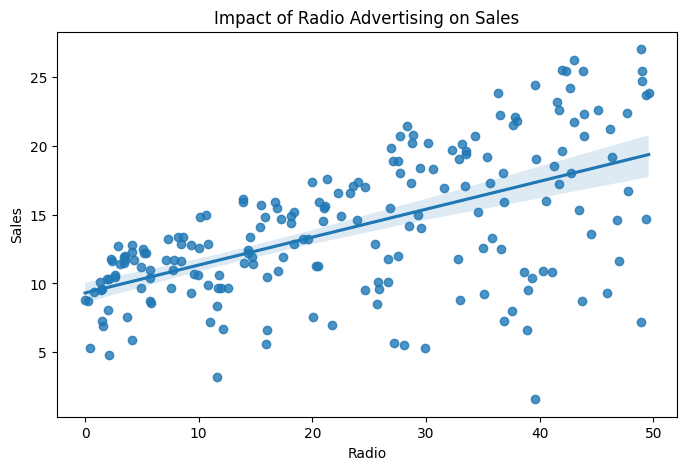

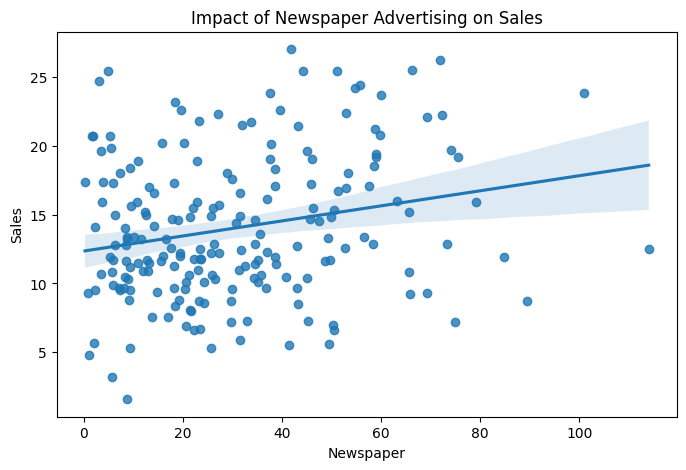


Correlation between Advertising Spend and Sales:
Unnamed: 0   -0.051616
TV            0.782224
Radio         0.576223
Newspaper     0.228299
Sales         1.000000
Name: Sales, dtype: float64

==================== BUSINESS INSIGHTS ====================
1️⃣ TV advertising has the strongest impact on sales.
2️⃣ Radio advertising also helps significantly.
3️⃣ Newspaper ads show the weakest correlation.
4️⃣ RandomForest performs better → nonlinear relationships exist.
5️⃣ Increasing TV & Radio budgets will maximize ROI.


In [ ]:
# =====================================================
# TASK 4: SALES PREDICTION USING PYTHON 
# =====================================================

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# ------------------------------------------
# 1. Load Dataset
# ------------------------------------------
df = pd.read_csv("Advertising.csv")   # Rename file if needed
print(df.head())
print(df.info())

# ------------------------------------------
# 2. Check for missing values
# ------------------------------------------
print("\nMissing values:\n", df.isna().sum())



# ------------------------------------------
# 3. Exploratory Data Analysis
# ------------------------------------------
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

sns.pairplot(df)
plt.show()

# ------------------------------------------
# 4. Feature Selection
# ------------------------------------------
X = df[['TV','Radio','Newspaper']]
y = df['Sales']

# ------------------------------------------
# 5. Train-Test Split
# ------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# ------------------------------------------
# 6. Linear Regression Model
# ------------------------------------------
lr = LinearRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)

# ------------------------------------------
# 7. Random Forest Model
# ------------------------------------------
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)

# ------------------------------------------
# 8. Model Evaluation Function
# ------------------------------------------
def evaluate(name, y_true, y_pred):
    print(f"\n===== {name} Evaluation =====")
    print("R2 Score:", r2_score(y_true, y_pred))
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))

evaluate("Linear Regression", y_test, pred_lr)
evaluate("Random Forest", y_test, pred_rf)

# ------------------------------------------
# 9. Predict Future Sales
# ------------------------------------------
sample = [[150, 30, 20]]  
future_prediction = rf.predict(sample)

print("\nPredicted sales for TV=150, Radio=30, Newspaper=20 → ", future_prediction[0])

# ------------------------------------------
# 10. Advertising Impact Analysis
# ------------------------------------------
plt.figure(figsize=(8,5))
sns.regplot(x=df['TV'], y=df['Sales'])
plt.title("Impact of TV Advertising on Sales")
plt.show()

plt.figure(figsize=(8,5))
sns.regplot(x=df['Radio'], y=df['Sales'])
plt.title("Impact of Radio Advertising on Sales")
plt.show()

plt.figure(figsize=(8,5))
sns.regplot(x=df['Newspaper'], y=df['Sales'])
plt.title("Impact of Newspaper Advertising on Sales")
plt.show()

print("\nCorrelation between Advertising Spend and Sales:")
print(df.corr()['Sales'])

# ------------------------------------------
# 11. Business Insights
# ------------------------------------------
print("\n==================== BUSINESS INSIGHTS ====================")
print("1️⃣ TV advertising has the strongest impact on sales.")
print("2️⃣ Radio advertising also helps significantly.")
print("3️⃣ Newspaper ads show the weakest correlation.")
print("4️⃣ RandomForest performs better → nonlinear relationships exist.")
print("5️⃣ Increasing TV & Radio budgets will maximize ROI.")
print("============================================================")
